Import required Python packages.

In [13]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import seaborn as sns

import pylab

import matplotlib.pyplot as plt

from scipy.stats import binom
%matplotlib inline

In [64]:
loans_income = pd.read_csv('/content/sample_data/loans_income.csv')
sp500_px = pd.read_csv('/content/sample_data/sp500_px.csv')

In [16]:
loans_income.shape

(50000, 1)

In [17]:
#Take a 1000 Samples
samples = loans_income.sample(n=1000)
samples.shape

(1000, 1)

In [19]:
samples.head

<bound method NDFrame.head of             x
19670   84000
47158   49000
38921  125000
44354  100000
28613  106000
...       ...
5316    45000
32970   65000
42466   45000
3942    38000
33549   98000

[1000 rows x 1 columns]>

In [21]:
samples.tail

<bound method NDFrame.tail of             x
19670   84000
47158   49000
38921  125000
44354  100000
28613  106000
...       ...
5316    45000
32970   65000
42466   45000
3942    38000
33549   98000

[1000 rows x 1 columns]>

In [23]:
#mean of 5 numbers
sample_mean_5 = samples.rolling(5).mean().x
sample_mean_5

19670        NaN
47158        NaN
38921        NaN
44354        NaN
28613    92800.0
          ...   
5316     47880.0
32970    48400.0
42466    45000.0
3942     46600.0
33549    58200.0
Name: x, Length: 1000, dtype: float64

In [24]:
sample_mean_5.shape

(1000,)

In [25]:
#Drop the NaN value
sample_mean_5 = sample_mean_5.dropna()

In [26]:
sample_mean_5.shape

(996,)

In [27]:
#mean of 5 numbers
sample_mean_5 = samples.rolling(5).mean().x
sample_mean_5 = sample_mean_5.dropna()

In [29]:
sample_mean_5

28613    92800.0
1800     78494.4
38605    83094.4
27889    82094.4
35347    81094.4
          ...   
5316     47880.0
32970    48400.0
42466    45000.0
3942     46600.0
33549    58200.0
Name: x, Length: 996, dtype: float64

In [31]:
sample_mean_5.shape

(996,)

In [32]:
#mean of 20 numbers
sample_mean_20 = samples.rolling(20).mean().x
sample_mean_20 = sample_mean_20.dropna()

In [33]:
sample_mean_20
sample_mean_20.shape

(981,)

In [34]:
# mean of 30 numbers
sample_mean_30 = samples.rolling(30).mean().x
sample_mean_30 = sample_mean_30.dropna()

In [35]:
sample_mean_30
sample_mean_30.shape

(971,)

Text(0.5, 1.0, 'Full Plot of the whole DATAFRAME')

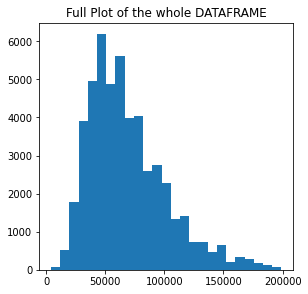

In [39]:
fig = plt.figure(figsize=(10,10))
#The full distribution of the plot:
ax = fig.add_subplot(2,2,1)
ax.hist(loans_income.x,bins=25)
plt.title('Full Plot of the whole DATAFRAME')

Text(0.5, 1.0, 'Full Plot of the 1000 samples')

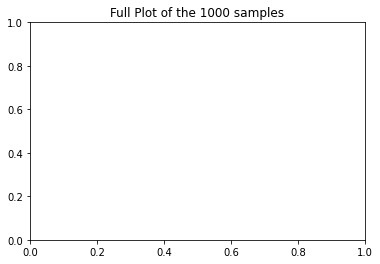

In [40]:
#distribution of 1000 samples:

ax = fig.add_subplot(2,2,2)
ax.hist(samples.x,bins=40)
plt.title('Full Plot of the 1000 samples')

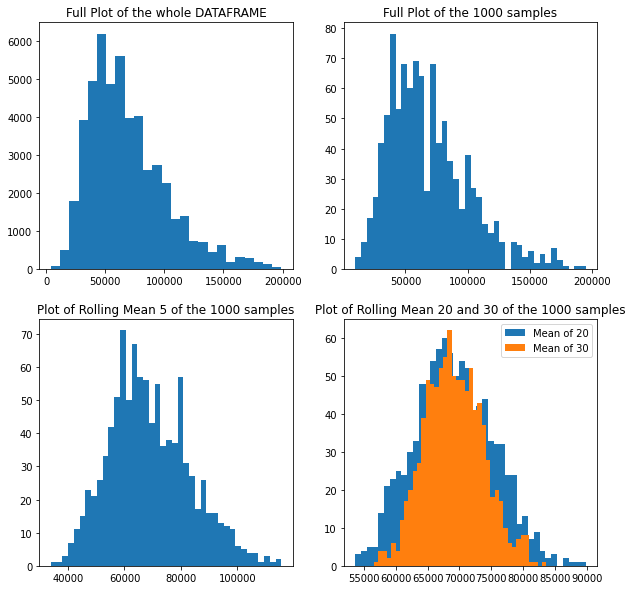

In [42]:
fig = plt.figure(figsize=(10,10))
#The full distribution of the plot:
ax = fig.add_subplot(2,2,1)
ax.hist(loans_income.x,bins=25)
plt.title('Full Plot of the whole DATAFRAME')

#distribution of 1000 samples:
ax = fig.add_subplot(2,2,2)
ax.hist(samples.x,bins=40)
plt.title('Full Plot of the 1000 samples')

#distribution of means of 5 numbers from 1000 samples:
ax = fig.add_subplot(2,2,3)
ax.hist(sample_mean_5,bins=40)
plt.title('Plot of Rolling Mean 5 of the 1000 samples')

#distribution of means of 20 numbers from 1000 samples:
ax = fig.add_subplot(2,2,4)
ax.hist(sample_mean_20,bins=40,label='Mean of 20')
ax.hist(sample_mean_30,bins=40,label='Mean of 30')
plt.title('Plot of Rolling Mean 20 and 30 of the 1000 samples')
ax.legend()
plt.show()

plt.show()

##**Sampling Distribution of a Statistic**

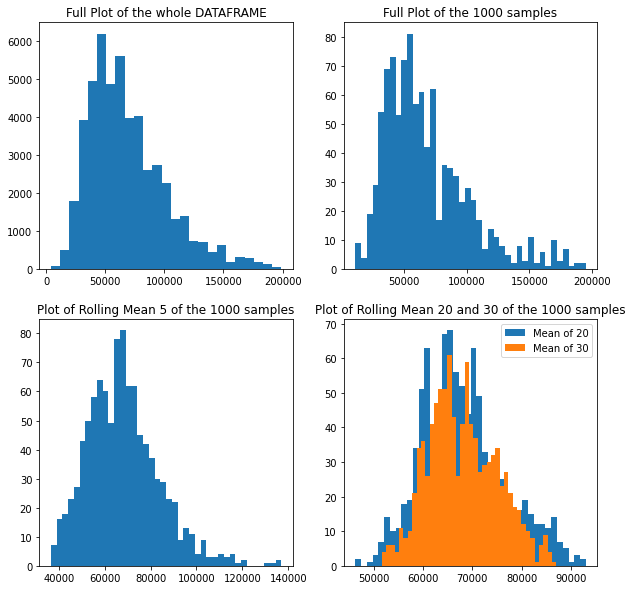

In [43]:
#Calculating a rolling mean:

#Take a 1000 Samples
samples = loans_income.sample(n=1000)

#mean of 5 numbers
sample_mean_5 = samples.rolling(5).mean().x
sample_mean_5 = sample_mean_5.dropna()

#mean of 20 numbers
sample_mean_20 = samples.rolling(20).mean().x
sample_mean_20 = sample_mean_20.dropna()

# mean of 30 numbers
sample_mean_30 = samples.rolling(30).mean().x
sample_mean_30 = sample_mean_30.dropna()

fig = plt.figure(figsize=(10,10))
#The full distribution of the plot:
ax = fig.add_subplot(2,2,1)
ax.hist(loans_income.x,bins=25)
plt.title('Full Plot of the whole DATAFRAME')

#distribution of 1000 samples:

ax = fig.add_subplot(2,2,2)
ax.hist(samples.x,bins=40)
plt.title('Full Plot of the 1000 samples')

#distribution of means of 5 numbers from 1000 samples:
ax = fig.add_subplot(2,2,3)
ax.hist(sample_mean_5,bins=40)
plt.title('Plot of Rolling Mean 5 of the 1000 samples')

#distribution of means of 20 numbers from 1000 samples:
ax = fig.add_subplot(2,2,4)
ax.hist(sample_mean_20,bins=40,label='Mean of 20')
ax.hist(sample_mean_30,bins=40,label='Mean of 30')
plt.title('Plot of Rolling Mean 20 and 30 of the 1000 samples')
ax.legend()
plt.show()

plt.show()

###**Population stats**

In [44]:
#Calculating a rolling mean:
print('Total Population STD : ',loans_income.x.std())
print('Total Population Mean : ',loans_income.x.mean())
print('Total Population Median : ',np.median(loans_income.x))
print('Total Population Standard Error:',stats.sem(loans_income.x, ddof=1))
#ddof Delta Degrees of Freedom

Total Population STD :  32872.03536985002
Total Population Mean :  68760.51844
Total Population Median :  62000.0
Total Population Standard Error: 147.00821129152527


###**Bootstrapping for 1000,10000,20000 Samples**

In [46]:
bootstrap_1000 = np.random.choice(loans_income.x,size=1000,replace=True)
bootstrap_10000 = np.random.choice(loans_income.x,size=10000,replace=True)
bootstrap_20000 = np.random.choice(loans_income.x,size=20000,replace=True)

In [47]:
bootstrap_1000.shape

(1000,)

In [48]:
bootstrap_10000.shape

(10000,)

In [50]:
arr_bootstraps = [bootstrap_1000,bootstrap_10000,bootstrap_20000]
arr_bootstraps

[array([ 35000,  45000, 125000,  90000, 120000,  62000,  86056,  36000,
        100000,  90000,  29037,  50000, 105000, 100000,  80000,  92000,
         45996, 110000,  81000, 103000,  71000,  60000,  40000,  80000,
         53000,  44000,  50000, 104000,  70000,  64000,  90000,  58332,
         87445,  36500, 115000,  27919,  92000,  60000,  46200,  70000,
        130000,  80000,  90000,  30000,  51000,  68000, 109000,  97700,
         68559, 115000,  44000,  84800,  50000,  29444,  36000,  80000,
         48000,  76409,  60000, 128000,  20000,  75000,  85000,  59850,
         76000,  65000,  70000, 115000,  85000,  26280,  35000,  30000,
         67000,  75000,  85000, 115000,  75000,  49000,  47000,  63000,
         32000,  40000, 102000,  52000,  67500,  66500,  95000,  41000,
         75000, 103000,  55000, 150000,  36000,  60000,  48000,  60000,
         36000, 132000,  40000,  30000, 120000,  50877, 115000,  42000,
         42000, 150000,  40000,  28000,  65000,  69000,  67500, 

In [51]:
len(arr_bootstraps)

3

In [52]:
#Calculating a rolling mean:
for i in range(len(arr_bootstraps)):
    print('Bootstrap Stats for {} examples \n'.format(len(arr_bootstraps[i])))
    print('------------------------------------------------------------------------------\n')
    print('Bootstrap STD : ',np.std(arr_bootstraps[i],ddof=1))
    print('Bootstrap Mean : ',np.mean(arr_bootstraps[i]))
    print('Bootstrap Median: ',np.median(arr_bootstraps[i]))
    print('Boostrap Bias, ',loans_income.x.mean() - np.mean(arr_bootstraps[i],axis=0))
    print('Standard Error:',stats.sem(arr_bootstraps[i], ddof=1))
    print('\n------------------------------------------------------------------------------\n')

Bootstrap Stats for 1000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32295.52018671087
Bootstrap Mean :  68777.609
Bootstrap Median:  64460.0
Boostrap Bias,  -17.090559999996913
Standard Error: 1021.2740200995271

------------------------------------------------------------------------------

Bootstrap Stats for 10000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32979.727071286696
Bootstrap Mean :  69071.7661
Bootstrap Median:  62000.0
Boostrap Bias,  -311.24765999999363
Standard Error: 329.797270712867

------------------------------------------------------------------------------

Bootstrap Stats for 20000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32742.516445364854
Bootstrap Mean :  68780.53835
Bootstrap Median:  62000.0
Boostrap Bias,  -20.01991000000271
Standard Error: 231.52455411629538

--

##**7. Long-tailed Distributions and QQ-Plot**

In [65]:
stats.probplot(loans_income.x, dist="norm", plot=pylab
pylab.show()

SyntaxError: ignored

**The above qq plot tells us that the sample which we have is not normally distributed**
*   What is a QQ Plot?
    *  A plot to visualize how close a sample is to a normal distribution




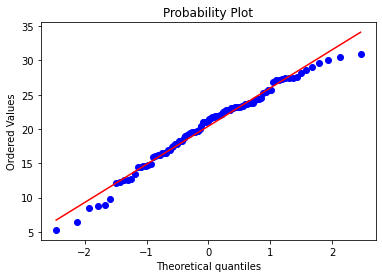

In [54]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [67]:
nflx = sp500_px.loc[:,'NFLX']

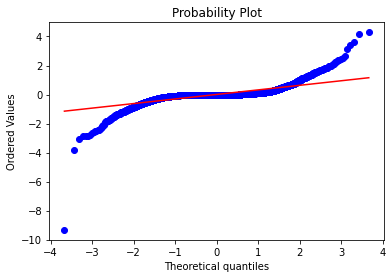

In [68]:
stats.probplot(nflx, dist="norm", plot=pylab)
pylab.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:1280: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


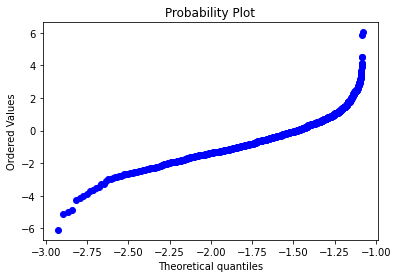

In [69]:
# After standardizing tread

treated_nflx = np.diff(np.log(nflx))
stats.probplot(treated_nflx, dist="norm", plot=pylab,fit=True)
pylab.show()